# The numpy.ramdom package

### Programming for Data Analysis assessment 2019

## 1. Introduction
In this notebook I will explain the use of the numpy.random package in Python. It is organized into four distinct sections, each corresponding to a specific task as outlined in the assignment document. The accompanying README summarizes the findings of this investigation.

### Preliminaries

In [1]:
# matplotlib settings.
%matplotlib inline

# Import required packages.
import matplotlib.pyplot as plt
import numpy as np

***
## 2. The purpose of the numpy.random package

The numpy.random package is a group of functions that allow for efficient fast generation of arrays containing samples of random numbers; these sample values can be drawn from many different types of probability distribution.   

***
## 3. Simple random data and Permutations

## 3.1 Simple random data

The very first function generates random numbers from a uniform distribution, in the interval $[0, 1)$. A uniform distribution implies that all numbers in the interval are equally likely to be generated. The interval as written here includes 0 but not 1. The random numbers can be generated in an array of specified size, or singly if no array size given.

In [2]:
# Generate a single random number.
np.random.rand()

0.2315431602612451

Text(0, 0.5, 'number')

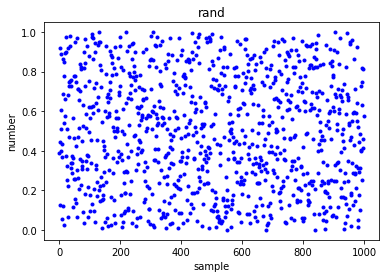

In [6]:
# Generate an array of random numbers, array size given as a parameter.
x = np.random.rand(1000)
plt.plot(x, 'b.')
plt.title('rand')
plt.xlabel('sample')
plt.ylabel('number')
#plt.hist(x)

Notice how the random numbers generated fill the range 0 to 1. 


Compare this with generating numbers from a different type of distribution, the standard normal distribution of mean 0 and variance 1. The mean is the average value. The variance measures now far the numbers are spread out from the mean in the distribution. 

Text(0, 0.5, 'number')

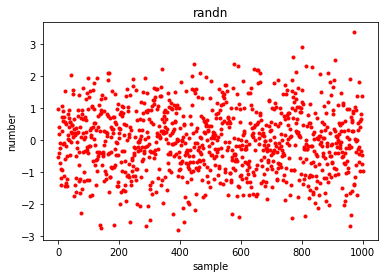

In [5]:
# Return numbers from a standard normal distribution with mean 0 and variance 1.
x = np.random.randn(1000)
plt.plot(x, 'r.')
plt.title('randn')
plt.xlabel('sample')
plt.ylabel('number')
#plt.hist(x

Notice how these numbers are more bunched around zero.

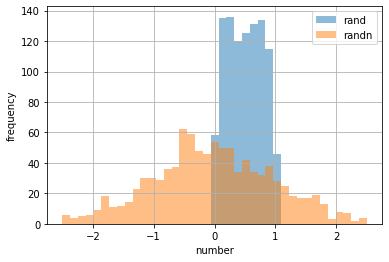

In [7]:
# Compare the two functions just used.
bins = np.linspace(-2.5, 2.5, 40)
plt.hist(np.random.rand(1000), bins, alpha=0.5, label='rand')
plt.hist(np.random.randn(1000), bins, alpha=0.5, label='randn')
plt.xlabel('number')
plt.ylabel('frequency')
plt.grid()
plt.legend(loc='upper right')

Notice how, using rand, the generated numbers lie within a range and all have the same chance of being sampled. The randn function generates numbers with a spread, with numbers around the specified mean having highest frequency. We can manipulate the latter distribution by playing around with the parameters; shrink the variance to reduce the spread and offset the sample by the mean. The numbers are now drawn from $N(\mu, \sigma^2)$ where $\mu$ is the mean, $\sigma^2$ is the variance, and $\sigma$ is the standard deviation.

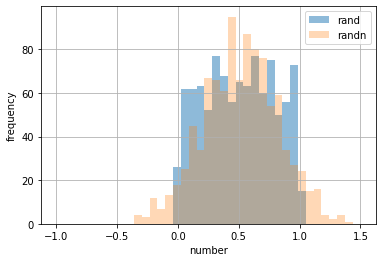

In [16]:
# Modify randn pars to make it seem nore similar to rand.
bins = np.linspace(-1, 1.5, 40)
plt.hist(np.random.rand(1000), bins, alpha=0.5, label='rand')
plt.hist(0.3 * np.random.randn(1000) + 0.5, bins, alpha=0.3, label='randn')
plt.xlabel('number')
plt.ylabel('frequency')
plt.grid()
plt.legend(loc='upper right')

There seems to be a number of functions which, on first glance, appear to do the same thing.

In [6]:
# Randomly select 5 numbers from a list, once a number is picked it can't be chosen again.
# Eg picking my Euromillions numbers.
np.arange(1, 51) # list of integers from 1 to 50
np.random.choice(np.arange(1, 51), 5, replace=False)

array([24, 29,  7, 48, 45])

## 3.2 Permutations

***
## 4. Distribution functions

***
## 5. The use of seeds in generating pseudorandom numbers

In [7]:
x = np.random.rand(10000)

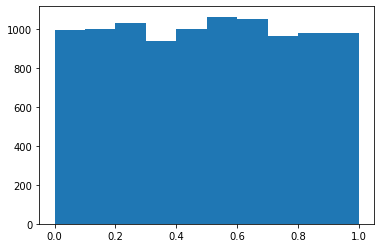

In [8]:

plt.hist(x)
plt.show()

***
Uniform distribution within a range

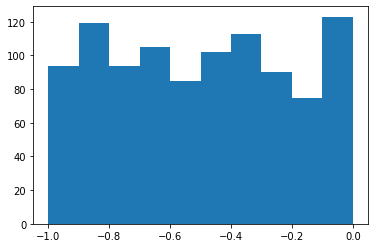

In [9]:
r = np.random.uniform(-1, 0, 1000)
plt.hist(r)
plt.show()

***
Uniform distribution centered around a value with given spread.

(array([  3.,  10.,  54., 146., 257., 274., 158.,  75.,  22.,   1.]),
 array([ 6.47624195,  7.1678699 ,  7.85949785,  8.5511258 ,  9.24275374,
         9.93438169, 10.62600964, 11.31763759, 12.00926553, 12.70089348,
        13.39252143]),
 <a list of 10 Patch objects>)

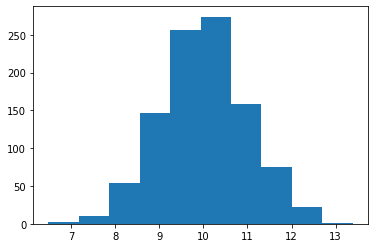

In [10]:
mu, sigma = 10, 1
n = np.random.normal(mu, sigma, 1000)
plt.hist(n)

***
Logistic distribution

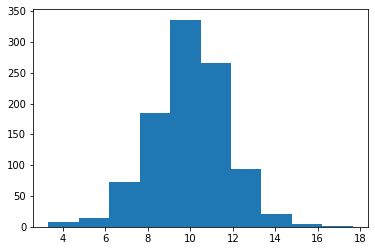

In [11]:
loc, scale = 10, 1
s = np.random.logistic(loc, scale, 1000)
plt.hist(s)
plt.show()

***
Exponential distribution

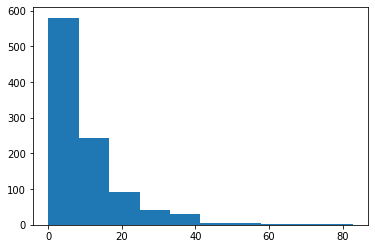

In [12]:
e = np.random.exponential(10, 1000)
plt.hist(e)
plt.show()

***
Seeds in numpy.random

In [13]:
seed = 1
np.random.RandomState(seed)

In [14]:
## np.random.get_state()